In [1]:
import pandas as pd
df = pd.read_csv('ddos_imbalanced/final_dataset.csv')
df = df.sample(frac=0.1, random_state=42)

In [2]:
df = df.sample(frac=0.5, random_state=42)
df

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
4912856,4074387,172.31.66.68-77.72.83.21-3389-16038-6,77.72.83.21,16038,172.31.66.68,3389,6,20/02/2018 02:20:45,1634575,8,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
5435745,182932,192.168.10.25-192.229.211.40-56584-443-6,192.229.211.40,443,192.168.10.25,56584,6,03/07/2017 09:11:55 PM,4,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6632641,4393866,172.31.66.95-95.215.62.54-3389-60877-6,95.215.62.54,60877,172.31.66.95,3389,6,20/02/2018 04:48:04,15062075,11,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2940780,7442952,169.254.169.254-172.31.65.11-80-49667-6,172.31.65.11,49667,169.254.169.254,80,6,20/02/2018 11:51:40,54970985,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6118441,707253,172.31.0.2-172.31.64.46-53-50497-17,172.31.64.46,50497,172.31.0.2,53,17,20/02/2018 01:50:50,273,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914457,4563010,172.31.0.2-172.31.67.122-53-64123-17,172.31.67.122,64123,172.31.0.2,53,17,20/02/2018 04:28:15,28192,2,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7286258,3703765,172.31.0.2-172.31.66.29-53-61175-17,172.31.66.29,61175,172.31.0.2,53,17,20/02/2018 02:57:42,18758,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2552609,6301666,172.31.0.2-172.31.65.100-53-57935-17,172.31.65.100,57935,172.31.0.2,53,17,20/02/2018 10:05:47,921,1,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1462347,4490298,172.31.67.113-54.243.149.101-53442-443-6,54.243.149.101,443,172.31.67.113,53442,6,20/02/2018 03:52:25,24,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [3]:
X = df.drop(['Label'], axis = 1)
Y = df['Label']

In [4]:
Y.value_counts()

Label
Benign    316070
ddos       64756
Name: count, dtype: int64

<Axes: ylabel='count'>

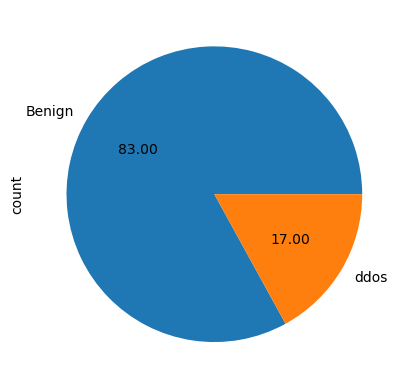

In [5]:
Y.value_counts().plot.pie(autopct='%.2f')

In [6]:
def remove_duplicates(df):
    """Check for and remove duplicate rows in the dataset."""
    before = df.shape[0]
    df = df.drop_duplicates()
    after = df.shape[0]
    duplicates_removed = before - after
    if duplicates_removed > 0:
        print(f"Removed {duplicates_removed} duplicate rows.")
    else:
        print("No duplicate rows found.")
    return df

In [7]:
def ip_to_int(ip):
    """Convert an IP address string to an integer. Returns 0 on failure."""
    try:
        return int(ipaddress.ip_address(ip))
    except Exception:
        return 0

In [8]:
important_features = [
        'Flow ID', 'Timestamp', 'Fwd Seg Size Min', 
        'Src IP', 'Dst IP', 'Flow IAT Min', 
        'Src Port', 'Tot Fwd Pkts', 'Init Bwd Win Byts'
]
    
# Subset the dataframe to only the important features and the target
df = df[important_features + ['Label']]
    
# Convert Flowid to numeric categorical codes
df['Flow ID'] = pd.factorize(df['Flow ID'])[0]
    
# Convert Timestamp to datetime then to epoch seconds
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Timestamp'] = df['Timestamp'].astype('int64') // 10**9  # Convert to seconds
    
# Convert IP addresses to integers
df['Src IP'] = df['Src IP'].apply(ip_to_int)
df['Dst IP'] = df['Dst IP'].apply(ip_to_int)
    
df['Label'] = df['Label'].map({'Benign': 0, 'ddos': 1})

df = remove_duplicates(df)
    
# Ensure remaining columns are numeric
numeric_columns = ['Fwd Seg Size Min', 'Flow IAT Min', 'Src Port', 'Tot Fwd Pkts', 'Init Bwd Win Byts']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# Optional: handle missing values (e.g., fill with 0)
df.fillna(0, inplace=True)
    
# Modify 'label' to the name of your target column
X = df.drop('Label', axis=1)
y = df['Label']

C:\Users\adwai\AppData\Local\Temp\ipykernel_3432\2866902196.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Flow ID'] = pd.factorize(df['Flow ID'])[0]
C:\Users\adwai\AppData\Local\Temp\ipykernel_3432\2866902196.py:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
C:\Users\adwai\AppData\Local\Temp\ipykernel_3432\2866902196.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Removed 1625 duplicate rows.


C:\Users\adwai\AppData\Local\Temp\ipykernel_3432\2866902196.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dst IP'] = df['Dst IP'].apply(ip_to_int)
C:\Users\adwai\AppData\Local\Temp\ipykernel_3432\2866902196.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['Label'].map({'Benign': 0, 'ddos': 1})


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
    
# Scale features (especially important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
y_train

5400409    0
3048056    0
5990148    0
5137637    0
3738519    0
          ..
2210954    0
5835694    0
1509861    0
4733635    0
2306165    0
Name: Label, Length: 303360, dtype: int64

In [11]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 50557
Before OverSampling, counts of label '0': 252803 

After OverSampling, the shape of train_X: (505606, 9)
After OverSampling, the shape of train_y: (505606,) 

After OverSampling, counts of label '1': 252803
After OverSampling, counts of label '0': 252803


In [12]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = {}

for name, model in models.items():
    print(f"\nTraining model: {name}")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f"Training time: {train_time:.2f} seconds")
        
        # Predict on test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
        
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(f"Classification Report for {name}:\n{report}")
    print(f"Confusion Matrix for {name}:\n{cm}")
    
    results[name] = {
            'accuracy': accuracy,
            'classification_report': report,
            'confusion_matrix': cm,
            'training_time': train_time
        }
        


Training model: Logistic Regression
Training time: 1.02 seconds
Accuracy for Logistic Regression: 0.9232
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     63202
           1       0.76      0.78      0.77     12639

    accuracy                           0.92     75841
   macro avg       0.86      0.87      0.86     75841
weighted avg       0.92      0.92      0.92     75841

Confusion Matrix for Logistic Regression:
[[60121  3081]
 [ 2740  9899]]

Training model: Random Forest
Training time: 19.94 seconds
Accuracy for Random Forest: 0.9996
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63202
           1       1.00      1.00      1.00     12639

    accuracy                           1.00     75841
   macro avg       1.00      1.00      1.00     75841
weighted avg       1.00      1.00      

C:\Users\adwai\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [07:49:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training time: 0.79 seconds
Accuracy for XGBoost: 0.9994
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63202
           1       1.00      1.00      1.00     12639

    accuracy                           1.00     75841
   macro avg       1.00      1.00      1.00     75841
weighted avg       1.00      1.00      1.00     75841

Confusion Matrix for XGBoost:
[[63186    16]
 [   30 12609]]

Training model: KNN
Training time: 1.14 seconds
Accuracy for KNN: 0.9643
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     63202
           1       0.90      0.89      0.89     12639

    accuracy                           0.96     75841
   macro avg       0.94      0.93      0.94     75841
weighted avg       0.96      0.96      0.96     75841

Confusion Matrix for KNN:
[[61927  1275]
 [ 1434 11205]]


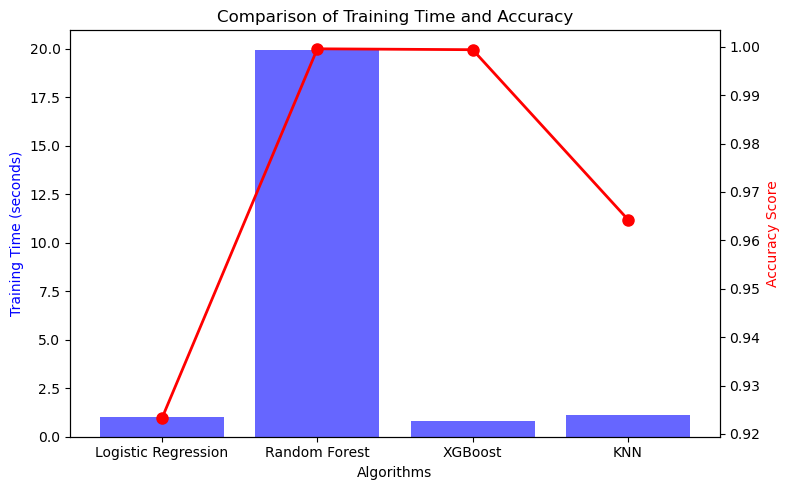

In [13]:
import matplotlib.pyplot as plt

# Extracting algorithm names, training times, and accuracies from results dictionary
algorithms = list(results.keys())
training_times = [results[algo]['training_time'] for algo in algorithms]
accuracies = [results[algo]['accuracy'] for algo in algorithms]

# Creating figure and axis
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for training time
ax1.bar(algorithms, training_times, color='blue', alpha=0.6, label="Training Time (s)")
ax1.set_ylabel("Training Time (seconds)", color='blue')
ax1.set_xlabel("Algorithms")

# Create a secondary axis for accuracy
ax2 = ax1.twinx()
ax2.plot(algorithms, accuracies, color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label="Accuracy Score")
ax2.set_ylabel("Accuracy Score", color='red')

# Title and layout
plt.title("Comparison of Training Time and Accuracy")
fig.tight_layout()
plt.show()